# Data Visualization

This notebook is meant for data visualization and (potential) preprocessing before using the data for model training. Our data is stored on XetHub, and we will use the Python SDK they provide to access our data without the need for local copies. 

First, installation of `pyxet` and other dependencies:

In [1]:
%pip install pyxet
%pip install polars
%pip install pandas
%pip install numpy
%pip install pyarrow

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


Now, let's install all the relevant libraries:

In [1]:
import pyxet         # make xet:// protocol available   
import pandas as pd 
import polars as pl  # faster alternative to pandas
import numpy as np
import pyarrow
import matplotlib.pyplot as plt

fs = pyxet.XetFS()

## Data Loading 

Now, let's access our data and load it into `pd.DataFrame` objects,

In [2]:
# get the drug training and testing data
df_drugs_train = pl.read_csv('xet://drug_data/drugsComTrain_raw.tsv', separator = '\t')
df_drugs_test = pl.read_csv('xet://drug_data/drugsComTest_raw.tsv', separator = '\t')
df_drugs_train.head(10)

,drugName,condition,review,rating,date,usefulCount
i64,str,str,str,f64,str,i64
206461,"""Valsartan""","""Left Ventricul…","""""It has no sid…",9.0,"""May 20, 2012""",27
95260,"""Guanfacine""","""ADHD""","""""My son is hal…",8.0,"""April 27, 2010…",192
92703,"""Lybrel""","""Birth Control""","""""I used to tak…",5.0,"""December 14, 2…",17
138000,"""Ortho Evra""","""Birth Control""","""""This is my fi…",8.0,"""November 3, 20…",10
35696,"""Buprenorphine …","""Opiate Depende…","""""Suboxone has …",9.0,"""November 27, 2…",37
155963,"""Cialis""","""Benign Prostat…","""""2nd day on 5m…",2.0,"""November 28, 2…",43
165907,"""Levonorgestrel…","""Emergency Cont…","""""He pulled out…",1.0,"""March 7, 2017""",5
102654,"""Aripiprazole""","""Bipolar Disord…","""""Abilify chang…",10.0,"""March 14, 2015…",32
74811,"""Keppra""","""Epilepsy""",""""" I Ve had no…",1.0,"""August 9, 2016…",11


In [5]:
df_drugs_train.select(pl.col[165907])

TypeError: 'Expr' object is not callable

In [4]:
# get the shape of the training and testing sets
print(df_drugs_train.shape)
print(df_drugs_test.shape)

(161297, 7)
(53766, 7)


In [5]:
# preview one of the reviews
df_drugs_train["review"][0]

'"It has no side effect, I take it in combination of Bystolic 5 Mg and Fish Oil"'

## Data Description / Visualization

We now begin EDA, first looking at some simple summary statistics, checking for null values, and getting a feel for the data.

In [6]:
# basic descriptions
df_drugs_train.describe()

shape: (9, 8)
┌────────┬────────┬────────┬───────┬───────┬───────┬───────┬───────┐
│ descri ┆        ┆ drugNa ┆ condi ┆ revie ┆ ratin ┆ date  ┆ usefu │
│ be     ┆ ---    ┆ me     ┆ tion  ┆ w     ┆ g     ┆ ---   ┆ lCoun │
│ ---    ┆ f64    ┆ ---    ┆ ---   ┆ ---   ┆ ---   ┆ str   ┆ t     │
│ str    ┆        ┆ str    ┆ str   ┆ str   ┆ f64   ┆       ┆ ---   │
│        ┆        ┆        ┆       ┆       ┆       ┆       ┆ f64   │
╞════════╪════════╪════════╪═══════╪═══════╪═══════╪═══════╪═══════╡
│ count  ┆ 161297 ┆ 161297 ┆ 16129 ┆ 16129 ┆ 16129 ┆ 16129 ┆ 16129 │
│        ┆ .0     ┆        ┆ 7     ┆ 7     ┆ 7.0   ┆ 7     ┆ 7.0   │
│ null_c ┆ 0.0    ┆ 0      ┆ 899   ┆ 0     ┆ 0.0   ┆ 0     ┆ 0.0   │
│ ount   ┆        ┆        ┆       ┆       ┆       ┆       ┆       │
│ mean   ┆ 115923 ┆ null   ┆ null  ┆ null  ┆ 6.994 ┆ null  ┆ 28.00 │
│        ┆ .58530 ┆        ┆       ┆       ┆ 377   ┆       ┆ 4755  │
│        ┆ 5      ┆        ┆       ┆       ┆       ┆       ┆       │
│ std    ┆ 67004. ┆ 

In [7]:
# check for null values
df_drugs_train.select(pl.all().is_null().sum())

shape: (1, 7)
┌─────┬──────────┬───────────┬────────┬────────┬──────┬────────────┐
│     ┆ drugName ┆ condition ┆ review ┆ rating ┆ date ┆ usefulCoun │
│ --- ┆ ---      ┆ ---       ┆ ---    ┆ ---    ┆ ---  ┆ t          │
│ u32 ┆ u32      ┆ u32       ┆ u32    ┆ u32    ┆ u32  ┆ ---        │
│     ┆          ┆           ┆        ┆        ┆      ┆ u32        │
╞═════╪══════════╪═══════════╪════════╪════════╪══════╪════════════╡
│ 0   ┆ 0        ┆ 899       ┆ 0      ┆ 0      ┆ 0    ┆ 0          │
└─────┴──────────┴───────────┴────────┴────────┴──────┴────────────┘

Now, we look at the unique values we have in our columns

In [8]:
# check our ratings and see what unique values we have
df_drugs_train.select(['rating']).unique()

shape: (10, 1)
┌────────┐
│ rating │
│ ---    │
│ f64    │
╞════════╡
│ 1.0    │
│ 3.0    │
│ 2.0    │
│ 10.0   │
│ …      │
│ 9.0    │
│ 7.0    │
│ 5.0    │
│ 8.0    │
└────────┘

In [9]:
# check unique conditions
df_drugs_train.select(['condition']).unique()['condition']

shape: (885,)
Series: 'condition' [str]
[
	"mist ("
	"Ventricular Fi…
	"NSAID-Induced …
	"Peripheral T-c…
	"Bronchitis"
	"Borderline Per…
	"Renal Transpla…
	"Hidradenitis S…
	"Opiate Adjunct…
	"Abdominal Dist…
	"Postherpetic N…
	"Warts"
	…
	"Gastrointestin…
	"Ascariasis"
	"Ulcerative Pro…
	"Dementia"
	"25</span> user…
	"Hypoestrogenis…
	"COPD, Acute"
	"41</span> user…
	"New Daily Pers…
	"Osteolytic Bon…
	"23</span> user…
	"123</span> use…
	"Amyotrophic La…
]

In [10]:
# check unique drug names 
df_drugs_train.select(['drugName']).unique()['drugName']

shape: (3_436,)
Series: 'drugName' [str]
[
	"Delzicol"
	"CombiPatch"
	"Robitussin Col…
	"Urispas"
	"Gildess Fe 1 /…
	"Vienva"
	"Panitumumab"
	"Dorzolamide / …
	"Magnacet"
	"Dextroamphetam…
	"Perphenazine"
	"HyoMax SL"
	…
	"Duloxetine"
	"Junel 1.5 / 30…
	"Travoprost"
	"Anafranil"
	"Buproban"
	"Prazosin"
	"Aranesp"
	"Sucralfate"
	"Ciprodex"
	"Degarelix"
	"Zanamivir"
	"Zyrtec-D"
	"Urso"
]

In [11]:
# look at the first 20 reviews
df_drugs_train.select(['review']).unique()['review'][0:20]

shape: (20,)
Series: 'review' [str]
[
	""I was on the …
	""Im only 15 an…
	""I was diagnos…
	""I&#039;ve tak…
	""This is not t…
	""I have many, …
	""You won&#039;…
	""I used this d…
	""this medicine…
	""Before this p…
	""Prozac got ri…
	""I&#039;ve bee…
	""Flo max is a …
	""Well so far I…
	""I had unprote…
	""At 37 I was w…
	""This drug is …
	""I have taken …
	""I&#039;ve bee…
	""I&#039;m goin…
]

We now turn our attention to the reviews themselves. Some basic visualization:

In [7]:
review_word_count = df_drugs_train.select(['review']).map_rows(lambda t: len(t[0].split(" ")))
review_word_count.describe()

statistic,map
str,f64
"""count""",161297.0
"""null_count""",0.0
"""mean""",85.646788
"""std""",45.507389
"""min""",1.0
"""25%""",49.0
"""50%""",85.0
"""75%""",127.0
"""max""",1857.0


Installed osx event loop hook.


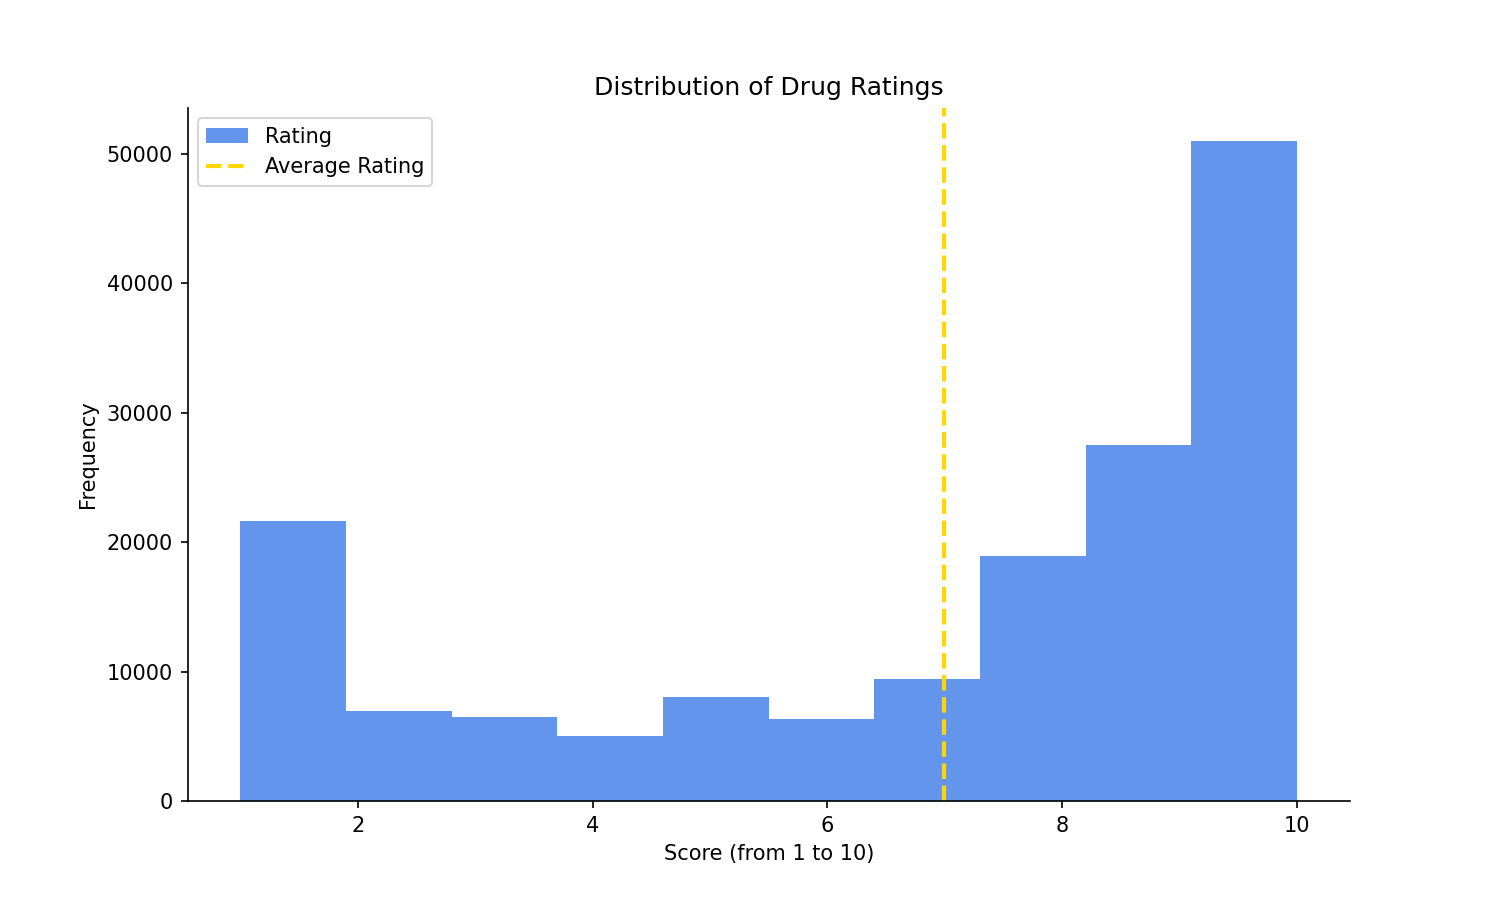

In [13]:
# create figure 
plt.figure(figsize = (10, 6))

# Remove top and right borders
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# plotting
plt.hist(df_drugs_train['rating'], bins = 10, color = "cornflowerblue", label = "Rating")
plt.axvline(df_drugs_train['rating'].mean(), color = "gold", linestyle = "dashed", linewidth = 2, label = "Average Rating")
plt.title("Distribution of Drug Ratings")
plt.savefig("rating_dist")
plt.xlabel('Score (from 1 to 10)')
plt.ylabel('Frequency')
plt.legend()
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


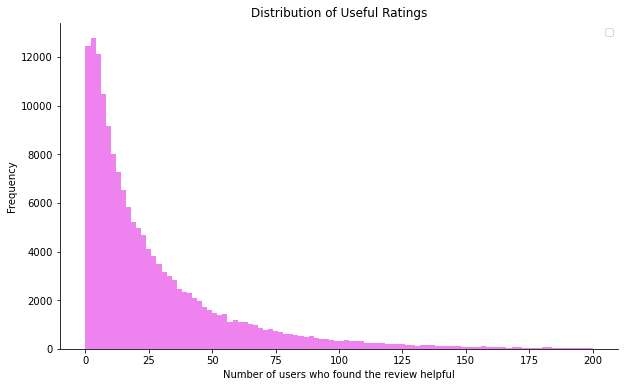

In [8]:
# create figure 
plt.figure(figsize = (10, 6))

# Remove top and right borders
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# plotting useful count (the number of users who found a particular review helpful)
plt.hist(df_drugs_train['usefulCount'], range = [0, 200], bins = 100, color = "violet")
plt.xlabel('Number of users who found the review helpful')
plt.ylabel('Frequency')
plt.title("Distribution of Useful Ratings")
plt.savefig("rating_dist")
plt.legend()
plt.show()

Now we consider the reviews. Specifically the word count of each review

In [9]:
print(np.quantile(review_word_count, 0.95))
print(np.quantile(review_word_count, 0.05)) # 14 words

147.0
14.0


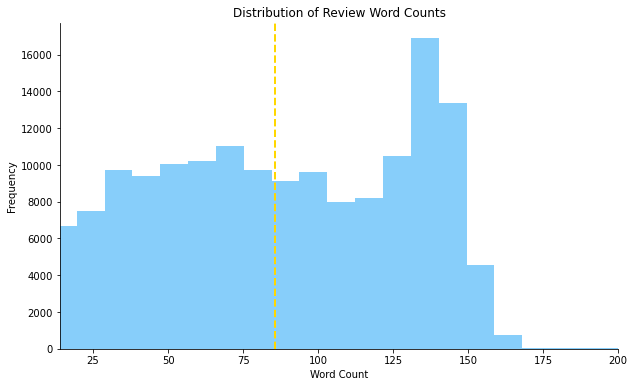

In [10]:
plt.figure(figsize = (10, 6))

# Remove top and right borders
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.title("Distribution of Review Word Counts")
plt.xlabel('Word Count')
plt.ylabel('Frequency')
plt.xlim(14, 200)
plt.hist(review_word_count, bins = 200, color = "lightskyblue")
plt.axvline(review_word_count.mean().row(0)[0], color = "gold", linestyle = "dashed", linewidth = 2, label = "Average Word Count")
plt.show()

[shape: (161_297,)
Series: 'map' [i64]
[
	79
	741
	755
	448
	719
	403
	142
	733
	193
	737
	730
	460
	…
	700
	217
	233
	742
	760
	139
	432
	392
	689
	262
	95
	772
	347
]]


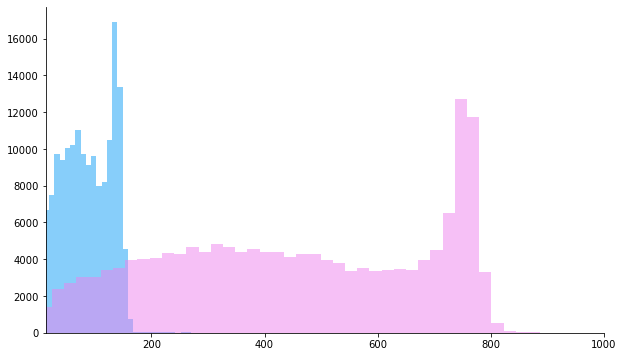

In [11]:
plt.figure(figsize = (10, 6))

# Remove top and right borders
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)


review_char_count = df_drugs_train.select(['review']).map_rows(lambda t: len(t[0]))
print(list(review_char_count))
plt.hist(review_word_count, bins = 200, color = "lightskyblue")
plt.hist(review_char_count, bins = 500, alpha = 0.5, color = "violet")
plt.xlim(14, 1000)
plt.show()

# Uncomment to inspect the reviews with less than or more than a certain number of words
#for rev in df_drugs_train.filter(review_word_count['map'] < 5)['review']:
#   print(rev.strip('\n'))

There are 5 reviews over 1000 words and two of them look identical. There might be more duplicates in the review column.

Getting the basic descriptive stats, data types, etc.

In [18]:
# Get descripive stats
df_drugs_train.describe()

shape: (9, 8)
┌────────┬────────┬────────┬───────┬───────┬───────┬───────┬───────┐
│ descri ┆        ┆ drugNa ┆ condi ┆ revie ┆ ratin ┆ date  ┆ usefu │
│ be     ┆ ---    ┆ me     ┆ tion  ┆ w     ┆ g     ┆ ---   ┆ lCoun │
│ ---    ┆ f64    ┆ ---    ┆ ---   ┆ ---   ┆ ---   ┆ str   ┆ t     │
│ str    ┆        ┆ str    ┆ str   ┆ str   ┆ f64   ┆       ┆ ---   │
│        ┆        ┆        ┆       ┆       ┆       ┆       ┆ f64   │
╞════════╪════════╪════════╪═══════╪═══════╪═══════╪═══════╪═══════╡
│ count  ┆ 161297 ┆ 161297 ┆ 16129 ┆ 16129 ┆ 16129 ┆ 16129 ┆ 16129 │
│        ┆ .0     ┆        ┆ 7     ┆ 7     ┆ 7.0   ┆ 7     ┆ 7.0   │
│ null_c ┆ 0.0    ┆ 0      ┆ 899   ┆ 0     ┆ 0.0   ┆ 0     ┆ 0.0   │
│ ount   ┆        ┆        ┆       ┆       ┆       ┆       ┆       │
│ mean   ┆ 115923 ┆ null   ┆ null  ┆ null  ┆ 6.994 ┆ null  ┆ 28.00 │
│        ┆ .58530 ┆        ┆       ┆       ┆ 377   ┆       ┆ 4755  │
│        ┆ 5      ┆        ┆       ┆       ┆       ┆       ┆       │
│ std    ┆ 67004. ┆ 

In [19]:
# get column names and their dtypes
df_drugs_train.schema

OrderedDict([('', Int64),
             ('drugName', Utf8),
             ('condition', Utf8),
             ('review', Utf8),
             ('rating', Float64),
             ('date', Utf8),
             ('usefulCount', Int64)])

In [20]:
# check if all the rows are unique 
print(df_drugs_train.is_unique().all())

True


In [21]:
# check for nulls
df_drugs_train.null_count()

shape: (1, 7)
┌─────┬──────────┬───────────┬────────┬────────┬──────┬────────────┐
│     ┆ drugName ┆ condition ┆ review ┆ rating ┆ date ┆ usefulCoun │
│ --- ┆ ---      ┆ ---       ┆ ---    ┆ ---    ┆ ---  ┆ t          │
│ u32 ┆ u32      ┆ u32       ┆ u32    ┆ u32    ┆ u32  ┆ ---        │
│     ┆          ┆           ┆        ┆        ┆      ┆ u32        │
╞═════╪══════════╪═══════════╪════════╪════════╪══════╪════════════╡
│ 0   ┆ 0        ┆ 899       ┆ 0      ┆ 0      ┆ 0    ┆ 0          │
└─────┴──────────┴───────────┴────────┴────────┴──────┴────────────┘

Since there are over 800 `null` values in `condition`, let's take a closer look. This column represents the medical conditions of respondents, so we cannot just drop those. Instead, we fill with `not_reported`. This ensures no null values.

In [22]:
# fill missing values with "not_reported"
df_filled = df_drugs_train.with_columns(
    pl.col("condition").fill_null(pl.lit("not_reported")),
)

# check if we no longer have null values
print(df_filled.null_count())

shape: (1, 7)
┌─────┬──────────┬───────────┬────────┬────────┬──────┬────────────┐
│     ┆ drugName ┆ condition ┆ review ┆ rating ┆ date ┆ usefulCoun │
│ --- ┆ ---      ┆ ---       ┆ ---    ┆ ---    ┆ ---  ┆ t          │
│ u32 ┆ u32      ┆ u32       ┆ u32    ┆ u32    ┆ u32  ┆ ---        │
│     ┆          ┆           ┆        ┆        ┆      ┆ u32        │
╞═════╪══════════╪═══════════╪════════╪════════╪══════╪════════════╡
│ 0   ┆ 0        ┆ 0         ┆ 0      ┆ 0      ┆ 0    ┆ 0          │
└─────┴──────────┴───────────┴────────┴────────┴──────┴────────────┘


# XSUM Dataset

In [23]:
df_xsum = pl.from_pandas(pd.read_parquet('xet://xsum/predictions.parquet'))
print(df_xsum.shape)
df_xsum.head()

(11334, 3)


shape: (5, 3)
┌──────────────────────┬─────────────────────┬─────────────────────┐
│ text                 ┆ target              ┆ evaluation_predicti │
│ ---                  ┆ ---                 ┆ ons                 │
│ str                  ┆ str                 ┆ ---                 │
│                      ┆                     ┆ list[i64]           │
╞══════════════════════╪═════════════════════╪═════════════════════╡
│ Amina Al-Jeffery,    ┆ A woman who claims  ┆ [0, 202, … 0]       │
│ 21, who was bo…      ┆ her father ha…      ┆                     │
│ The concerns came    ┆ JogScotland's       ┆ [0, 139, … 0]       │
│ amid Sportscot…      ┆ future could be at… ┆                     │
│ Backbench MPs can    ┆ Before Jeremy       ┆ [0, 9083, … 0]      │
│ speak relative…      ┆ Corbyn became lead… ┆                     │
│ The company says the ┆ Boeing has shown    ┆ [0, 23241, … 0]     │
│ new overhea…         ┆ off its "space …    ┆                     │
│ The vote held on  

# CNN/Dailymail Dataset

In [24]:
files_cnn = fs.ls('xet://cnn_dailymail/1.0.0')
df_dir = pl.from_dicts(files_cnn)
print("==================== Current Working Dir ls =====================")
print(df_dir.head())
# print(df_dir.select(["name"]).head(1).item())
df_cnn = pl.from_pandas(pd.read_parquet('xet://{}'.format(df_dir.select(["name"]).head(1).item())))
# df_cnn = pl.from_pandas(pd.read_parquet('xet://cnn_dailymail/1.0.0/test-00000-of-00001.parquet'))
print(df_cnn.shape)
df_cnn.head()

==================== Current Working Dir ls =====================
shape: (5, 3)
┌───────────────────────────────────┬───────────┬──────┐
│ name                              ┆ size      ┆ type │
│ ---                               ┆ ---       ┆ ---  │
│ str                               ┆ i64       ┆ str  │
╞═══════════════════════════════════╪═══════════╪══════╡
│ cnn_… ┆ 29994057  ┆ file │
│ cnn_… ┆ 256494215 ┆ file │
│ cnn_… ┆ 256538980 ┆ file │
│ cnn_… ┆ 259242781 ┆ file │
│ cnn_… ┆ 34657215  ┆ file │
└───────────────────────────────────┴───────────┴──────┘
(11490, 3)


shape: (5, 3)
┌──────────────────────┬─────────────────────┬─────────────────────┐
│ article              ┆ highlights          ┆ id                  │
│ ---                  ┆ ---                 ┆ ---                 │
│ str                  ┆ str                 ┆ str                 │
╞══════════════════════╪═════════════════════╪═════════════════════╡
│ (CNN)The Palestinian ┆ Membership gives    ┆ f001ec5c4704938247d │
│ Authority o…         ┆ the ICC jurisdi…    ┆ 27a44948eebb3…      │
│ (CNN)Never mind cats ┆ Theia, a bully      ┆ 230c522854991d053fe │
│ having nine…         ┆ breed mix, was ap…  ┆ 98a718b1defa0…      │
│ (CNN)If you've been  ┆ Mohammad Javad      ┆ 4495ba8f3a340d97a9d │
│ following th…        ┆ Zarif has spent m…  ┆ f1476f8a35502…      │
│ (CNN)Five Americans  ┆ 17 Americans were   ┆ a38e72fed88684ec8d6 │
│ who were mon…        ┆ exposed to the…     ┆ 0dd5856282e99…      │
│ (CNN)A Duke student  ┆ Student is no       ┆ c27cf1b136cc270023d │
│ has admitted…     